# Reading and Cleaning Climate Data

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# cdc wonder Daily Air Temp by County (aggregated by month)
# Jan 1, 1979 - Dec 31, 2011
temp_df = pd.read_csv('data/climate_data/2011_AirTemp_byState.txt', delimiter="\t", header=0)
particulateMatter_df = pd.read_csv('data/climate_data/2011_fineParticulateMatter_µgm3.txt', delimiter="\t", header=0)

# Read in Temperature Data

In [409]:
temperature_files = os.listdir('./data/01_climate_data/monthlyAirTemp_byCounty_RAW/')
temperature_files.remove('.ipynb_checkpoints')

In [410]:
temp_1979_df = pd.read_csv('./data/01_climate_data/monthlyAirTemp_byCounty_RAW/dailyAirTemp_byCounty_1979.txt', delimiter='\t', header=0)
temp_1979_df = temp_1979_df[temp_1979_df['County'].isna() == False]
temp_1979_df = temp_1979_df[temp_1979_df['Notes'] != 'Total']

In [411]:
temp_1979_df.columns

Index(['Notes', 'County', 'County Code', 'Month, Year', 'Month, Year Code',
       'Avg Daily Max Air Temperature (F)',
       'Record Count for Daily Max Air Temp (F)',
       'Min Temp for Daily Max Air Temp (F)',
       'Max Temp for Daily Max Air Temp (F)',
       'Avg Daily Min Air Temperature (F)',
       'Record Count for Daily Min Air Temp (F)',
       'Min Temp for Daily Min Air Temp (F)',
       'Max Temp for Daily Min Air Temp (F)', 'Avg Daily Max Heat Index (F)',
       'Record Count for Daily Max Heat Index (F)',
       'Min for Daily Max Heat Index (F)', 'Max for Daily Max Heat Index (F)'],
      dtype='object')

In [412]:
temp_1979_df = temp_1979_df[['County', 'County Code', 'Month, Year', 'Month, Year Code', 'Record Count for Daily Max Air Temp (F)' ,'Avg Daily Max Air Temperature (F)', 'Min Temp for Daily Max Air Temp (F)', 'Max Temp for Daily Max Air Temp (F)']]

In [413]:
# making the above easier with a function to grab data in folder, read it in, remove unwanted stuff and return a clean df
def process_temp_data(filename):
    file_string = './data/01_climate_data/monthlyAirTemp_byCounty_RAW/' + filename
    temp_df = pd.read_csv(file_string, delimiter='\t', header=0)
    
    #drop unneccesary rows
    temp_df = temp_df[temp_df['County'].isna() == False]
    temp_df = temp_df[temp_df['Notes'] != 'Total'] #drop the total rows
    
    # create UID
    temp_df['UID'] = temp_df['County'] + " - " + temp_df['Month, Year']
    
    #get only needed columns
    output_df = temp_df[['UID', 'County', 'County Code', 'Month, Year', 'Month, Year Code','Avg Daily Max Air Temperature (F)', 'Min Temp for Daily Max Air Temp (F)', 'Max Temp for Daily Max Air Temp (F)']]
    output_df = output_df.rename(columns={'Avg Daily Max Air Temperature (F)': 'avg_dailyMaxAirTemp_F', 'Min Temp for Daily Max Air Temp (F)': 'min_dailyMaxAirTemp_F', 'Max Temp for Daily Max Air Temp (F)': 'max_dailyMaxAirTemp_F'})
    return output_df

In [414]:
# run process data function on all data in temperature files
air_temperature_df = [process_temp_data(file) for file in temperature_files]
air_temperature_df = pd.concat(air_temperature_df)

# sort the values
air_temperature_df.sort_values(by=['County Code', 'Month, Year Code'], inplace=True)

In [415]:
# turn objects to categories to save memory
air_temperature_df['County'] = air_temperature_df['County'].astype('category')
air_temperature_df['Month, Year'] = air_temperature_df['Month, Year'].astype('category')
air_temperature_df['Month, Year Code'] = air_temperature_df['Month, Year Code'].astype('category')

In [416]:
# #write out clean data to csv
# temp_compression_opts = dict(method='zip',
#                         archive_name='airTempMonthly_1979_2011.csv')


# air_temperature_df.to_csv('./data/01_climate_data/01_climate_data_CLEAN/airTempMonthly_1979_2011.zip', index=False, compression=temp_compression_opts)

In [408]:
# # read in clean csv just to test it works
# data = pd.read_csv('./data/01_climate_data/01_climate_data_CLEAN/airTempMonthly_1979_2011.csv')
# data.info()

# Read in the Particulate Matter Data

In [417]:
# make list of files in particulate matter
particle_files = os.listdir('./data/01_climate_data/monthlyParticulateMatter_RAW/')
#particle_files

In [418]:
test_pfm_df = pd.read_csv('./data/01_climate_data/monthlyParticulateMatter_RAW/monthlyFPM_byCounty_2009.txt', delimiter="\t", header=0)

In [419]:
test_pfm_df.head(2)

,Notes,County,County Code,"Month, Year","Month, Year Code",Avg Fine Particulate Matter (�g/m�),# of Observations for Fine Particulate Matter,Min Fine Particulate Matter,Max Fine Particulate Matter,Avg Fine Particulate Matter Standard Deviation
0,NaN,"Autauga County, AL",1001.0,"Jan, 2009",2009/01,10.61,372.0,3.9,19.2,4.33
1,NaN,"Autauga County, AL",1001.0,"Feb, 2009",2009/02,12.11,336.0,3.7,28.7,5.69


In [420]:
test_pfm_df = test_pfm_df[test_pfm_df['County'].isna() == False]
test_pfm_df = test_pfm_df[test_pfm_df['Notes'] != 'Total']

In [421]:
test_pfm_df.columns

Index(['Notes', 'County', 'County Code', 'Month, Year', 'Month, Year Code',
       'Avg Fine Particulate Matter (�g/m�)',
       '# of Observations for Fine Particulate Matter',
       'Min Fine Particulate Matter', 'Max Fine Particulate Matter',
       'Avg Fine Particulate Matter Standard Deviation'],
      dtype='object')

In [422]:
def process_fpm_data(filename):
    file_string = './data/01_climate_data/monthlyParticulateMatter_RAW/' + filename
    fpm_df = pd.read_csv(file_string, delimiter='\t', header=0)
    
    #drop unneccesary rows
    fpm_df = fpm_df[fpm_df['County'].isna() == False]
    fpm_df = fpm_df[fpm_df['Notes'] != 'Total'] #drop the total rows
    
    # create UID
    fpm_df['UID'] = fpm_df['County'] + " - " + fpm_df['Month, Year']
    
    #get only needed columns
    output_df = fpm_df[['UID', 'County', 'County Code', 'Month, Year', 'Month, Year Code', 'Avg Fine Particulate Matter (�g/m�)' ,'Min Fine Particulate Matter', 'Max Fine Particulate Matter']]
    final_df = output_df.rename(columns={'Avg Fine Particulate Matter (�g/m�)': 'avg_FPM', 'Min Fine Particulate Matter': 'min_FPM', 'Max Fine Particulate Matter': 'max_FPM'})
    return final_df

In [423]:
read_fpm_data(particle_files[2]).head(2)

,County,County Code,"Month, Year","Month, Year Code",avg_FPM,min_FPM,max_FPM
0,"Autauga County, AL",1001.0,"Jan, 2011",2011/01,11.64,3.5,21.2
1,"Autauga County, AL",1001.0,"Feb, 2011",2011/02,13.08,5.8,29.4


In [424]:
# run process data function on all data in temperature files
fine_particulate_matter_df = [process_fpm_data(file) for file in particle_files]
fine_particulate_matter_df = pd.concat(fine_particulate_matter_df)

# sort the values
fine_particulate_matter_df.sort_values(by=['County Code', 'Month, Year Code'], inplace=True)

In [425]:
# turn objects to categories to save memory
fine_particulate_matter_df['County'] = fine_particulate_matter_df['County'].astype('category')
fine_particulate_matter_df['Month, Year'] = fine_particulate_matter_df['Month, Year'].astype('category')
fine_particulate_matter_df['Month, Year Code'] = fine_particulate_matter_df['Month, Year Code'].astype('category')

In [444]:
fine_particulate_matter_df

,UID,County,County Code,"Month, Year","Month, Year Code",avg_FPM,min_FPM,max_FPM
0,"Autauga County, AL - Jan, 2003","Autauga County, AL",1001.0,"Jan, 2003",2003/01,11.37,2.5,18.2
1,"Autauga County, AL - Feb, 2003","Autauga County, AL",1001.0,"Feb, 2003",2003/02,11.27,1.2,22.4
2,"Autauga County, AL - Mar, 2003","Autauga County, AL",1001.0,"Mar, 2003",2003/03,12.56,2.4,27.1
3,"Autauga County, AL - Apr, 2003","Autauga County, AL",1001.0,"Apr, 2003",2003/04,15.77,5.4,33.5
4,"Autauga County, AL - May, 2003","Autauga County, AL",1001.0,"May, 2003",2003/05,17.13,7.0,32.0
...,...,...,...,...,...,...,...,...
40437,"Weston County, WY - Aug, 2011","Weston County, WY",56045.0,"Aug, 2011",2011/08,10.39,3.6,21.6
40438,"Weston County, WY - Sep, 2011","Weston County, WY",56045.0,"Sep, 2011",2011/09,9.82,3.7,21.2
40439,"Weston County, WY - Oct, 2011","Weston County, WY",56045.0,"Oct, 2011",2011/10,9.77,2.7,18.5
40440,"Weston County, WY - Nov, 2011","Weston County, WY",56045.0,"Nov, 2011",2011/11,10.81,4.0,20.3


In [426]:
# # creating a Unique Identifier to join later with other climate dfs
# fpm_compression_opts = dict(method='zip',
#                         archive_name='fpm_monthlyByCounty_2003_2011.csv')


# fine_particulate_matter_df.to_csv('./data/01_climate_data/01_climate_data_CLEAN/fpm_monthly_byCounty_2003_2011.zip', index=False, compression=fpm_compression_opts)

# Read in the Heat Wave Days

In [380]:
heat_files = os.listdir('./data/01_climate_data/heatWaveDays_RAW/')
#heat_files

In [381]:
test_df = pd.read_csv('./data/01_climate_data/heatWaveDays_RAW/heatWaveDays_1982_1985.txt', delimiter='\t', header=0)
test_df[test_df['County'].isna() == False].head(1)

,Notes,County,County Code,Year,Year Code,Heat Wave Days Based on Daily Maximum Temperature,Average Heat Wave Days Based on Daily Maximum Temperature,Average Heat Wave Days Based on Daily Maximum Temperature Standard Deviation,Heat Wave Days Based on Daily Maximum Heat Index,Average Heat Wave Days Based on Daily Maximum Heat Index,Average Heat Wave Days Based on Daily Maximum Heat Index Standard Deviation,Heat Wave Days Based on Net Daily Heat Stress,Average Heat Wave Days Based on Net Daily Heat Stress,Average Heat Wave Days Based on Net Daily Heat Stress Standard Deviation,Population,Average Population
0,NaN,"Autauga County, AL",1001.0,1982.0,1982.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,32015,32015.00


In [382]:
test_df.columns

Index(['Notes', 'County', 'County Code', 'Year', 'Year Code',
       'Heat Wave Days Based on Daily Maximum Temperature',
       'Average Heat Wave Days Based on Daily Maximum Temperature',
       'Average Heat Wave Days Based on Daily Maximum Temperature Standard Deviation',
       'Heat Wave Days Based on Daily Maximum Heat Index',
       'Average Heat Wave Days Based on Daily Maximum Heat Index',
       'Average Heat Wave Days Based on Daily Maximum Heat Index Standard Deviation',
       'Heat Wave Days Based on Net Daily Heat Stress',
       'Average Heat Wave Days Based on Net Daily Heat Stress',
       'Average Heat Wave Days Based on Net Daily Heat Stress Standard Deviation',
       'Population', 'Average Population'],
      dtype='object')

In [383]:
def process_heat_wave_data(filename):
    file_string = './data/01_climate_data/heatWaveDays_RAW/' + filename
    hw_df = pd.read_csv(file_string, delimiter='\t', header=0)
    
    #drop unneccesary rows
    hw_df = hw_df[hw_df['County'].isna() == False]
    hw_df = hw_df[hw_df['Notes'] != 'Total'] #drop the total rows
    
    #county code to int
    #hw_df = hw_df.astype({'County Code': 'int64'})
    
    # No UID in this df, since it doesn't have the Month, Year col

    
    #get only needed columns
    output_df = hw_df[['County', 'County Code', 'Year', 'Heat Wave Days Based on Daily Maximum Temperature', 'Heat Wave Days Based on Daily Maximum Heat Index', 'Heat Wave Days Based on Net Daily Heat Stress']]
    final_df = output_df.rename(columns={'Heat Wave Days Based on Daily Maximum Temperature': 'count_hwDays_onDailyMaxTemp', 'Heat Wave Days Based on Daily Maximum Heat Index': 'count_hwDays_onDailyMaxHeatIndex', 'Heat Wave Days Based on Net Daily Heat Stress': 'count_hwDays_onDailyNetHeatStress'})
    return final_df

In [384]:
heat_wave_df = [process_heat_wave_data(file) for file in heat_files]
heat_wave_df = pd.concat(heat_wave_df)
heat_wave_df.sort_values(by=['County Code', 'Year'], inplace=True)

In [385]:
heat_wave_df.to_csv('./data/01_climate_data/01_climate_data_CLEAN/heat_wave_days_1981_2010.csv', index=False)

In [235]:
# test = pd.read_csv('./data/01_climate_data/01_climate_data_CLEAN/heat_wave_days_1981_2010.csv')
# test.info()

# Read in Precipitation

In [427]:
test_precip = pd.read_csv('./data/01_climate_data/monthlyPrecipitation_RAW/monthlyPrecip_byCounty_1979.txt', delimiter="\t", header=0)
#test_precip

In [428]:
precipitation_files = os.listdir('./data/01_climate_data/monthlyPrecipitation_RAW/')
#precipitation_files

In [429]:
test_precip = test_precip[test_precip['County'].isna() != True]

In [430]:
test_precip = test_precip.astype({'County Code': 'int64'})

In [431]:
test_precip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40443 entries, 0 to 40442
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Notes                                      3111 non-null   object 
 1   County                                     40443 non-null  object 
 2   County Code                                40443 non-null  int64  
 3   Month, Year                                37332 non-null  object 
 4   Month, Year Code                           37332 non-null  object 
 5   Avg Daily Precipitation (mm)               40443 non-null  float64
 6   # of Observations for Daily Precipitation  40443 non-null  float64
 7   Min Daily Precipitation                    40443 non-null  float64
 8   Max Daily Precipitation                    40443 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.1+ MB


In [432]:
test_precip['UID'] = test_precip['County'] + " - " + test_precip['Month, Year Code']

In [433]:
def process_precip(filename):
    file_string = './data/01_climate_data/monthlyPrecipitation_RAW/' + filename
    precip_df = pd.read_csv(file_string, delimiter='\t', header=0)
    
    #drop unneccesary rows
    precip_df = precip_df[precip_df['County'].isna() == False]
    precip_df = precip_df[precip_df['Notes'] != 'Total'] #drop the total rows
    
    #county code to int
    #precip_df = precip_df.astype({'County Code': 'int64'})
    
    # create UID
    precip_df['UID'] = precip_df['County'] + " - " + precip_df['Month, Year']
    
    #get only needed columns
    output_df = precip_df[['UID', 'County', 'County Code', 'Month, Year', 'Month, Year Code', 'Avg Daily Precipitation (mm)' ,'Min Daily Precipitation', 'Max Daily Precipitation']]
    final_df = output_df.rename(columns={'Avg Daily Precipitation (mm)': 'avg_daily_precip_mm', 'Min Daily Precipitation': 'min_daily_precip_mm', 'Max Daily Precipitation': 'max_daily_precip_mm'})
    return final_df

In [434]:
precipitation_df = [process_precip(file) for file in precipitation_files]
precipitation_df = pd.concat(precipitation_df)

In [435]:
precipitation_df.sort_values(by=['County', 'Month, Year Code'], inplace=True)

In [436]:
precipitation_df.memory_usage(deep=True) / 1_000_000

Index                    9.855648
UID                    107.115228
County                  92.331756
County Code              9.855648
Month, Year             81.309096
Month, Year Code        78.845184
avg_daily_precip_mm      9.855648
min_daily_precip_mm      9.855648
max_daily_precip_mm      9.855648
dtype: float64

In [437]:
precipitation_df.columns

Index(['UID', 'County', 'County Code', 'Month, Year', 'Month, Year Code',
       'avg_daily_precip_mm', 'min_daily_precip_mm', 'max_daily_precip_mm'],
      dtype='object')

In [438]:
# turn objects to categories to save memory
precipitation_df['County'] = precipitation_df['County'].astype('category')
precipitation_df['Month, Year'] = precipitation_df['Month, Year'].astype('category')
precipitation_df['Month, Year Code'] = precipitation_df['Month, Year Code'].astype('category')

In [439]:
precipitation_df.memory_usage(deep=True) / 1_000_000

Index                    9.855648
UID                    107.115228
County                   2.763161
County Code              9.855648
Month, Year              2.506600
Month, Year Code         2.505808
avg_daily_precip_mm      9.855648
min_daily_precip_mm      9.855648
max_daily_precip_mm      9.855648
dtype: float64

In [443]:
precipitation_df

,UID,County,County Code,"Month, Year","Month, Year Code",avg_daily_precip_mm,min_daily_precip_mm,max_daily_precip_mm
29666,"Abbeville County, SC - Jan, 1979","Abbeville County, SC",45001.0,"Jan, 1979",1979/01,5.20,0.0,51.0
29667,"Abbeville County, SC - Feb, 1979","Abbeville County, SC",45001.0,"Feb, 1979",1979/02,6.61,0.0,42.9
29668,"Abbeville County, SC - Mar, 1979","Abbeville County, SC",45001.0,"Mar, 1979",1979/03,2.76,0.0,36.6
29669,"Abbeville County, SC - Apr, 1979","Abbeville County, SC",45001.0,"Apr, 1979",1979/04,6.75,0.0,55.0
29670,"Abbeville County, SC - May, 1979","Abbeville County, SC",45001.0,"May, 1979",1979/05,5.21,0.0,36.9
...,...,...,...,...,...,...,...,...
31116,"Ziebach County, SD - Aug, 2011","Ziebach County, SD",46137.0,"Aug, 2011",2011/08,1.67,0.0,16.9
31117,"Ziebach County, SD - Sep, 2011","Ziebach County, SD",46137.0,"Sep, 2011",2011/09,0.43,0.0,9.9
31118,"Ziebach County, SD - Oct, 2011","Ziebach County, SD",46137.0,"Oct, 2011",2011/10,0.76,0.0,20.8
31119,"Ziebach County, SD - Nov, 2011","Ziebach County, SD",46137.0,"Nov, 2011",2011/11,0.17,0.0,11.9


In [440]:
# creating a Unique Identifier to join later with other climate dfs
# precip_compression_opts = dict(method='zip',
#                         archive_name='precipitation_monthlyByCounty_1979_2011.csv')

# precipitation_df.to_csv('./data/01_climate_data/01_climate_data_CLEAN/precipitation_monthlyByCounty_1979_2011.zip', compression=precip_compression_opts)

# Combining all Climate Dfs into One

Here we will combine all climate data into one master data frame (sans the heat wave data, since that is not monthly), and write out to a zipped csv. This is to save on file size for github file size limits.

In [463]:
#all dfs to merge: precipitation_df, fine_particulate_matter_df, air_temperature_df
# contextual - heat_wave_df
precip_airTemp = pd.merge(air_temperature_df, precipitation_df, left_on='UID', right_on='UID')
combined_df = pd.merge(precip_airTemp, fine_particulate_matter_df, left_on='UID', right_on='UID', how='outer')

In [464]:
combined_df.columns

Index(['UID', 'County_x', 'County Code_x', 'Month, Year_x',
       'Month, Year Code_x', 'avg_dailyMaxAirTemp_F', 'min_dailyMaxAirTemp_F',
       'max_dailyMaxAirTemp_F', 'County_y', 'County Code_y', 'Month, Year_y',
       'Month, Year Code_y', 'avg_daily_precip_mm', 'min_daily_precip_mm',
       'max_daily_precip_mm', 'County', 'County Code', 'Month, Year',
       'Month, Year Code', 'avg_FPM', 'min_FPM', 'max_FPM'],
      dtype='object')

In [465]:
combined_df.drop(columns=['UID','County_y', 'County Code_y', 'Month, Year_y', 'Month, Year Code_y', 'County', 'County Code', 'Month, Year', 'Month, Year Code'], inplace=True)

In [466]:
combined_df.rename(columns={'County_x': 'county_name', 'County Code_x': 'county_FIPS', 'Month, Year_x': 'month_year_long', 'Month, Year Code_x': 'month_year_short'}, inplace=True)

In [467]:
combined_df.columns

Index(['county_name', 'county_FIPS', 'month_year_long', 'month_year_short',
       'avg_dailyMaxAirTemp_F', 'min_dailyMaxAirTemp_F',
       'max_dailyMaxAirTemp_F', 'avg_daily_precip_mm', 'min_daily_precip_mm',
       'max_daily_precip_mm', 'avg_FPM', 'min_FPM', 'max_FPM'],
      dtype='object')

In [469]:
# creating a Unique Identifier to join later with other climate dfs
final_compression_opts = dict(method='zip',
                        archive_name='combined_data_no_heatWave_1979_2011.csv')

combined_df.to_csv('./data/01_climate_data/01_climate_data_CLEAN/combined_data_no_heatWave_1979_2011.zip', compression=final_compression_opts)

In [468]:
combined_df.memory_usage(deep=True) / 1_000_000

Index                    9.855648
county_name              2.763161
county_FIPS              9.855648
month_year_long          2.506600
month_year_short         2.505808
avg_dailyMaxAirTemp_F    9.855648
min_dailyMaxAirTemp_F    9.855648
max_dailyMaxAirTemp_F    9.855648
avg_daily_precip_mm      9.855648
min_daily_precip_mm      9.855648
max_daily_precip_mm      9.855648
avg_FPM                  9.855648
min_FPM                  9.855648
max_FPM                  9.855648
dtype: float64

In [462]:
combined_df

,UID,county_name,county_FIPS,month_year_long,month_year_short,avg_dailyMaxAirTemp_F,min_dailyMaxAirTemp_F,max_dailyMaxAirTemp_F,avg_daily_precip_mm,min_daily_precip_mm,max_daily_precip_mm,avg_FPM,min_FPM,max_FPM
0,"Autauga County, AL - Jan, 1979","Autauga County, AL",1001.0,"Jan, 1979",1979/01,48.44,29.9,67.1,5.59,0.0,52.6,NaN,NaN,NaN
1,"Autauga County, AL - Feb, 1979","Autauga County, AL",1001.0,"Feb, 1979",1979/02,54.11,33.5,74.6,5.33,0.0,34.8,NaN,NaN,NaN
2,"Autauga County, AL - Mar, 1979","Autauga County, AL",1001.0,"Mar, 1979",1979/03,65.65,47.4,78.1,5.72,0.0,124.0,NaN,NaN,NaN
3,"Autauga County, AL - Apr, 1979","Autauga County, AL",1001.0,"Apr, 1979",1979/04,72.90,62.0,82.7,11.14,0.0,93.7,NaN,NaN,NaN
4,"Autauga County, AL - May, 1979","Autauga County, AL",1001.0,"May, 1979",1979/05,78.77,66.3,84.5,3.45,0.0,27.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231951,"Weston County, WY - Aug, 2011","Weston County, WY",56045.0,"Aug, 2011",2011/08,88.68,69.0,99.4,1.03,0.0,32.9,10.39,3.6,21.6
1231952,"Weston County, WY - Sep, 2011","Weston County, WY",56045.0,"Sep, 2011",2011/09,76.75,45.0,94.0,0.56,0.0,16.3,9.82,3.7,21.2
1231953,"Weston County, WY - Oct, 2011","Weston County, WY",56045.0,"Oct, 2011",2011/10,61.91,33.2,88.7,0.89,0.0,16.3,9.77,2.7,18.5
1231954,"Weston County, WY - Nov, 2011","Weston County, WY",56045.0,"Nov, 2011",2011/11,42.87,17.5,60.0,0.36,0.0,12.1,10.81,4.0,20.3


In [460]:
combined_df['UID'] = combined_df['UID'].astype('category')

In [461]:
combined_df.memory_usage(deep=True) / 1_000_000

Index                      9.855648
UID                      145.859668
county_name                2.763161
county_FIPS                9.855648
month_year_long            2.506600
month_year_short           2.505808
avg_dailyMaxAirTemp_F      9.855648
min_dailyMaxAirTemp_F      9.855648
max_dailyMaxAirTemp_F      9.855648
avg_daily_precip_mm        9.855648
min_daily_precip_mm        9.855648
max_daily_precip_mm        9.855648
avg_FPM                    9.855648
min_FPM                    9.855648
max_FPM                    9.855648
dtype: float64

# Inspecting Health Data

In [99]:
tx_county_inf_df = pd.read_csv('./data/IHME_USA_COUNTY_INFECT_DIS_MORT_1980_2014/IHME_USA_COUNTY_INFECT_DIS_MORT_1980_2014_TEXAS_Y2018M03D27.csv')

In [100]:
tx_county_diseases_df = tx_county_inf_df[tx_county_inf_df['location_name'] != 'Texas']

In [101]:
travis_county = tx_county_diseases_df[tx_county_diseases_df['location_name'] == 'Travis County']

In [111]:
travis_county.groupby(by='cause_name')[['mx']].mean()

,mx
cause_name,
Diarrheal diseases,0.900644
HIV/AIDS,7.402651
Hepatitis,1.225379
Lower respiratory infections,27.736082
Meningitis,0.771712
Tuberculosis,0.994986


In [115]:
travis_county = travis_county[travis_county['sex'] == 'Both']

In [117]:
travis_county.groupby(by=['cause_name', 'year_id'])[['mx']].mean()

mx
cause_name         year_id          
Diarrheal diseases 1980     0.385311
                   1981     0.388981
                   1982     0.356885
                   1983     0.356249
                   1984     0.358335
...                              ...
Tuberculosis       2010     0.355401
                   2011     0.324735
                   2012     0.331754
                   2013     0.311370
                   2014     0.319193

[210 rows x 1 columns]

<AxesSubplot:ylabel='Count'>

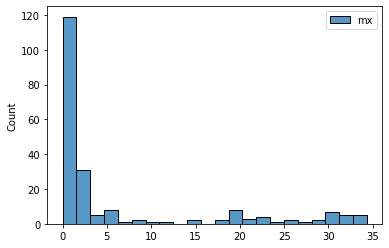

In [79]:
sns.histplot(travis_county.groupby(by=['cause_name', 'year_id'])[['mx']].mean())